In [1]:
import numpy as np
import torch
from torch import nn
from scipy import sparse
import time
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import zscore

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import env

In [4]:
Ninf_train = 50
N_train = 2000
T_train = 125
lam0_train = 10

Ninf_test = 500
N_test = 20000
T_test= 150
lam0_test = 100

In [8]:
numTrials = 1000
deaths = np.zeros((11, numTrials))

for k in range(11):
    t0 = time.time()
    a = np.zeros(11)
    a[k] = 1
    for trial in range(numTrials):
        if trial % 100 == 0:
            print(trial)
        deaths[k, trial] = env.trialEnv(a, Ninf_test, N_test, T_test, lam0_test)
    testtime = time.time() - t0
    print(testtime)
print(np.mean(deaths, axis=1))

0
100
200
300
400
500
600
700
800
900
2448.1831476688385
0
100
200
300
400
500
600
700
800
900
2451.921144247055
0
100
200
300
400
500
600
700
800
900
2445.9174551963806
0
100
200
300
400
500
600
700
800
900
2476.202786207199
0
100
200
300
400
500
600
700
800
900
2431.3364927768707
0
100
200
300
400
500
600
700
800
900
2408.6190803050995
0
100
200
300
400
500
600
700
800
900
2417.366996049881
0
100
200
300
400
500
600
700
800
900
2421.0746381282806
0
100
200
300
400
500
600
700
800
900
2419.504805326462
0
100
200
300
400
500
600
700
800
900
2424.1447138786316
0
100
200
300
400
500
600
700
800
900
2450.4984624385834
[190.729 206.638 143.529 206.651 245.839 213.915 210.949 216.495 179.207
 215.12  234.449]


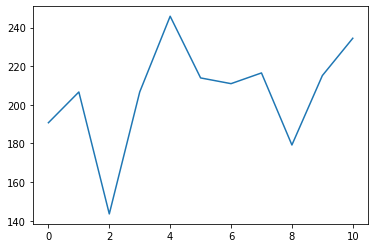

In [9]:
plt.plot(np.mean(deaths, axis=1))

In [10]:
d = {}
d['deaths'] = deaths
sio.savemat('heuristics.mat', d)